# Lecture 20 - PCA and PCR
## CMSE 381 - Fall 2023
## Oct 27, 2023



In [1]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

import seaborn as sns

# ML imports we've used previously
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. PCA on Penguins
![Palmer Penguins Picture](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

*Artwork by @allison_horst*


For this lab, we are going to again use the <a href = "https://allisonhorst.github.io/palmerpenguins/">Palmer Penguins</a> data set by Allison Horst, Alison Hill, and Kristen Gorman. You should have done this in a previous notebook, but if you don't have the package installed to get the data, you can run 
```
pip install palmerpenguins
```
to have access to the data. 

In [2]:
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()

#Shuffle the data
penguins = penguins.sample(frac=1)
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
87,Adelie,Dream,36.9,18.6,189.0,3500.0,female,2008
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
35,Adelie,Dream,39.2,21.1,196.0,4150.0,male,2007
15,Adelie,Torgersen,36.6,17.8,185.0,3700.0,female,2007
24,Adelie,Biscoe,38.8,17.2,180.0,3800.0,male,2007


Before we get to the full version, let's just take a look at two of the columns: flipper length and bill length. A nice thing we can do is to also color the data by which species label the data point has. 

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

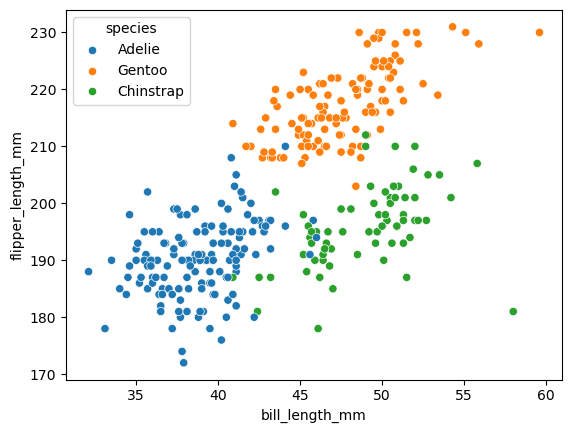

In [3]:
sns.scatterplot(x = penguins.bill_length_mm, 
                y = penguins.flipper_length_mm, 
                hue = penguins.species)

Before we get to it, we're going to just work with the columns that are numeric.  

In [4]:
penguins_num = penguins.select_dtypes(np.number)
penguins_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
87,36.9,18.6,189.0,3500.0,2008
273,50.4,15.7,222.0,5750.0,2009
35,39.2,21.1,196.0,4150.0,2007
15,36.6,17.8,185.0,3700.0,2007
24,38.8,17.2,180.0,3800.0,2007


We will also use mean centered data to make the visualization easier (meaning shifting our data to have mean 0 in every column, and have standard deviation 1). 

In [5]:
p_normalized = (penguins_num - penguins_num.mean())/penguins_num.std()
p_normalized.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
87,-1.296987,0.728778,-0.853822,-0.878096,-0.051716
273,1.171621,-0.743875,1.500670,1.916186,1.178381
35,-0.876409,1.998306,-0.354384,-0.070859,-1.281813
15,-1.351845,0.322529,-1.139215,-0.629716,-1.281813
24,-0.949553,0.017842,-1.495956,-0.505525,-1.281813


## PCA with just two input columns

To try to draw pictures similar to what we just saw on the slides, we'll first focus on two of the columns. 

In [6]:
penguins_subset2 = p_normalized[['bill_length_mm', 'flipper_length_mm']]
penguins_subset2

,bill_length_mm,flipper_length_mm
87,-1.296987,-0.853822
273,1.171621,1.500670
35,-0.876409,-0.354384
15,-1.351845,-1.139215
24,-0.949553,-1.495956
...,...,...
141,-0.620406,-0.996518
169,0.952189,1.429321
126,-0.949553,-0.711125
187,0.805901,1.357973


We run PCA using the `PCA` command from `scikitlearn`.

In [7]:
from sklearn.decomposition import PCA

In [8]:
# Set up the PCA object
pca = PCA(n_components=2)

# Fit it using our data
pca.fit(penguins_subset2)

PCA(n_components=2)

The `pca.components_` store information about the lines we are going to project our data onto. Specifically, each row gives us one of these lines.

In [9]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

(-2.426146908439034,
 3.1053642574684965,
 -2.277218996642162,
 3.2542921692653684)

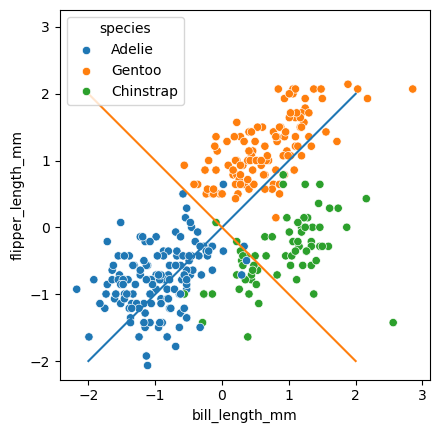

In [10]:
sns.scatterplot(data = penguins_subset2, 
                x = 'bill_length_mm', 
                y = 'flipper_length_mm', 
                hue = penguins.species)

for i, comp in enumerate(pca.components_):
    slope = comp[1]/comp[0]
    plt.plot(np.array([-2,2]), slope*np.array([-2,2]))
    
plt.axis('square')

A common way to look at the relative importance of the PC's is to draw these components as vectors with length based on the explained variance. 

In [11]:
pca.explained_variance_

array([1.65309564, 0.34690436])

(-2.426146908439034,
 3.1053642574684965,
 -2.277218996642162,
 3.2542921692653684)

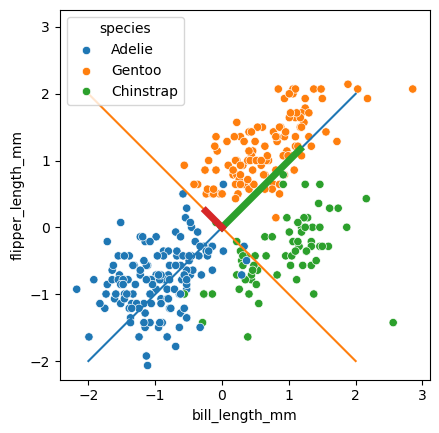

In [12]:
sns.scatterplot(data = penguins_subset2, 
                x = 'bill_length_mm', 
                y = 'flipper_length_mm', 
                hue = penguins.species)

for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    slope = comp[1]/comp[0]
    plt.plot(np.array([-2,2]), slope*np.array([-2,2]))
    
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )

plt.axis('square')

The next important part are the PC's, which we can get from the `pca` object as follows. I'm going to put them in a dataframe to make drawing and visualization easier. Basically, $PC_1$ is our $Z_1$ in the slides, and $PC_2$ is the $Z_2$.

In [13]:
# The transform function takes in bill,flipper data points, 
# and returns a PC1,PC2 coordinate for each one. 
penguins_pca = pca.transform(penguins_subset2)
penguins_pca = pd.DataFrame(data = penguins_pca, columns = ['PC1', 'PC2'])
penguins_pca.head()

,PC1,PC2
0,-1.520852,0.313365
1,1.889595,0.232672
2,-0.870303,0.369128
3,-1.761445,0.150352
4,-1.729236,-0.386365


This is the scatterplot of the data points transformed into the PC space. 

<Axes: xlabel='PC1', ylabel='PC2'>

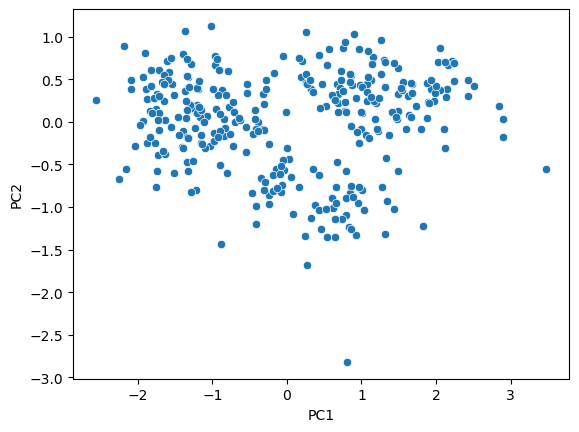

In [14]:
sns.scatterplot(data = penguins_pca, x = 'PC1', y = 'PC2')

&#9989; **<font color=red>Do this:</font>** What are the PC coordinates for the first data point (index 0)?  Which quadrant would this point be drawn in? 


In [15]:
# Extract PC coordinates for the first data point (index 0)
pc1 = penguins_pca.loc[0, 'PC1']
pc2 = penguins_pca.loc[0, 'PC2']
print(f"PC1: {pc1}, PC2: {pc2}")

# Determine the quadrant
if pc1 > 0 and pc2 > 0:
    print("Quadrant I")
elif pc1 < 0 and pc2 > 0:
    print("Quadrant II")
elif pc1 < 0 and pc2 < 0:
    print("Quadrant III")
else:
    print("Quadrant IV")

PC1: -1.5208516741115037, PC2: 0.3133652017675538
Quadrant II


Below is code that emphasizes the projected points. 

&#9989; **<font color=red>Do this:</font>** the value of `index` below is just picking out a different point in our data set.  Mess around with this number. How do the X and star points move around as you change `index`? 

/opt/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


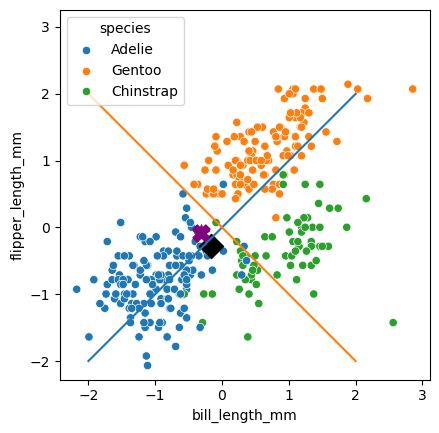

In [18]:
sns.scatterplot(data = penguins_subset2, 
                x = 'bill_length_mm', 
                y = 'flipper_length_mm', 
                hue = penguins.species)
plt.axis('square')

for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    slope = comp[1]/comp[0]
    plt.plot(np.array([-2,2]), slope*np.array([-2,2]))

#===========
# Emphasize one point and its projections
#===========

index = 180 #<---------- play with this!

# Get the original point
original_point = penguins_subset2.iloc[index].values.reshape(1, -1)

# Project the point onto the principal components
projected_point = pca.transform(original_point)

# Extract projected coordinates
X1 = projected_point[0, 0]  # Projection onto PC1 (x-coordinate)
Y1 = projected_point[0, 1]  # Projection onto PC1 (y-coordinate)
X2 = projected_point[0, 0]  # Projection onto PC2 (x-coordinate, same as PC1 for this 2D case)
Y2 = projected_point[0, 1]  # Projection onto PC2 (y-coordinate, same as PC1 for this 2D case)

# Here's one data point
plt.scatter([penguins_subset2.iloc[index,0]],
            [penguins_subset2.iloc[index,1]], 
            marker = 'D', color = 'black', s = 150)

# Here's the projection of that point on PC1 (X shape)
plt.scatter([X1], [Y1],
            marker='X', color='purple', s=150)

# And here's the projection of that point on PC2 (star)
plt.scatter([X2], [Y2],
            marker='*', color='purple', s=150)

Everything we just did is great for understanding what the PCA is doing, but in reality, we're usually going to be looking at the data in the transformed space. 

&#9989; **<font color=red>Do this:</font>** Make a scatter plot of PC1 and PC2. Color the points by `penguins.species`. What do you notice about how the points have moved from the (`bill`, `flipper`) scatter plot? 

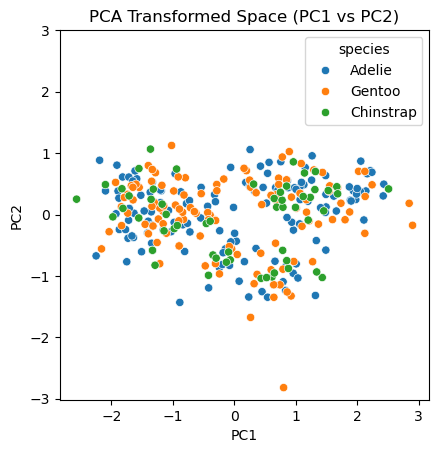

In [19]:
# Scatter plot of PC1 vs PC2, colored by species
sns.scatterplot(data=penguins_pca, 
                x='PC1', 
                y='PC2', 
                hue=penguins.species)
plt.title('PCA Transformed Space (PC1 vs PC2)')
plt.axis('square')
plt.show()

## Penguins PCA with all columns

We used only two columns above for visualization, but we can instead use all the input columns to run our PCA. 

In [21]:
penguins_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
87,36.9,18.6,189.0,3500.0,2008
273,50.4,15.7,222.0,5750.0,2009
35,39.2,21.1,196.0,4150.0,2007
15,36.6,17.8,185.0,3700.0,2007
24,38.8,17.2,180.0,3800.0,2007


In [22]:
pca = PCA(n_components=4)
penguins_pca_all = pca.fit_transform(penguins_num)
penguins_pca_all = pd.DataFrame(data = penguins_pca_all, 
                                columns = ['PC1', 'PC2', 'PC3', 'PC4'])
penguins_pca_all.head()

,PC1,PC2,PC3,PC4
0,-707.181178,-2.566195,-3.550348,0.916251
1,1543.098375,-2.204636,0.973339,0.048797
2,-57.149198,-5.688458,-2.466148,3.716340
3,-507.267081,-9.536685,-2.502738,-0.474159
4,-407.345966,-15.070595,1.104439,-1.961180


&#9989; **<font color=red>Do this:</font>** Make a scatter plot of PC1 and PC2 using this new model, and again color the points by `penguins.species`. What do you notice about how the PC plot has changed from the previous setting? 

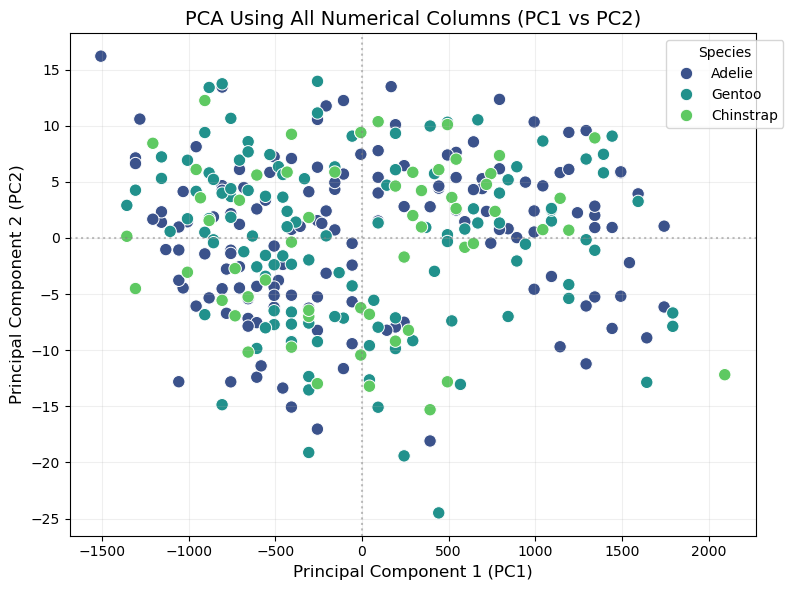

In [23]:
# Create scatter plot of PC1 vs PC2 (using all columns)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=penguins_pca_all,
    x='PC1',
    y='PC2',
    hue=penguins.species,
    palette='viridis',
    s=80
)

# Add labels and formatting
plt.title('PCA Using All Numerical Columns (PC1 vs PC2)', fontsize=14)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.axhline(0, color='gray', linestyle=':', alpha=0.5)
plt.axvline(0, color='gray', linestyle=':', alpha=0.5)
plt.grid(alpha=0.2)
plt.legend(title='Species', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


![Stop Icon](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Vienna_Convention_road_sign_B2a.svg/180px-Vienna_Convention_road_sign_B2a.svg.png)

Great, you got to here! Hang out for a bit, there's more lecture before we go on to the next portion. 

# PCR on Hitters Data

# Loading in the data

Ok, here we go, let's play with a baseball data set again. Note this cleanup is all the same as previously. 

In [24]:
df = pd.read_csv('Hitters.csv').dropna().drop('Player', axis = 1)
df.info()
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

In [26]:
y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    bool   
 17  Division_W   263 non-null    bool   
 18  NewLeague_N  263 non-null    bool   
dtypes: bool(3), f

# Principal Component Regression 

Ok, let's take a hard left turn and go try out some of the dimension reduction methods from Section 6.3. `Scikit-learn` doesn't have a built in function to do PCR (aka PCA and then regression) but it's just as easy for us to do it ourselves. 

First step, let's figure out the `PCA` function.

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale #<--- this does the scaling of variables for us


In [28]:
pca = PCA()
print(X.shape)
X_PC = pca.fit_transform(scale(X))
print(X_PC.shape)

(263, 19)
(263, 19)


"But Dr. Munch, you said PCA was supposed to do dimension reduction, why is my feature output the same size?"

Glad you asked, young data scientist. The PCA command outputs all of the PCs, all the way up through $p=19$ the original number of dimensions. 

So, if I want the first three PCs, I can get them out as follows. I'll put it in a data frame just to add column labels, but you don't need to do that.

In [29]:
First3PCs = X_PC[:,:3]

pd.DataFrame(First3PCs, columns = ['Z1','Z2', 'Z3'])

,Z1,Z2,Z3
0,-0.009649,-1.870522,1.265145
1,0.411434,2.429422,-0.909193
2,3.466822,-0.825947,0.555469
3,-2.558317,0.230984,0.519642
4,1.027702,1.573537,1.331382
...,...,...,...
258,-0.331167,0.165663,0.775890
259,3.246183,0.543315,1.209150
260,-1.094609,0.751386,-0.935937
261,1.977682,2.184517,-0.282012


Now we can just do regression on the PCs like before. 

In [30]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_PC[:,:3], y)
mean_squared_error(y,regr.predict(X_PC[:,:3]))

117234.531905816

&#9989; **<font color=red>Do this:</font>** My code above contains the rookie mistake of only reporting training error. Write modified code to return the 10-fold CV error of linear regression on the first 3 PCs.

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Create pipeline: Scaling -> PCA -> Regression
pcr_pipe = make_pipeline(
    StandardScaler(),  # Standardize features
    PCA(n_components=3),  # Keep first 3 PCs
    LinearRegression()
)

# 2. Run 10-fold CV (using negative MSE to follow sklearn convention)
cv_scores = -cross_val_score(
    pcr_pipe, 
    X, 
    y,  # Original salary (no log transform for interpretability)
    cv=10,
    scoring='neg_mean_squared_error'  # sklearn's convention: higher = better
)

# 3. Compute mean and std of MSE
mean_mse = np.mean(cv_scores)
std_mse = np.std(cv_scores)

print(f"10-Fold CV MSE: {mean_mse:,.2f} ± {std_mse:,.2f}")
print(f"Salary Range: ${y.min():,.0f} to ${y.max():,.0f}")
print(f"Mean Salary: ${y.mean():,.0f} ± ${y.std():,.0f}")

10-Fold CV MSE: 126,319.89 ± 74,165.61
Salary Range: $68 to $2,460
Mean Salary: $536 ± $451


&#9989; **<font color=red>Do this:</font>** Take the code you figured out above to get the score for 10-fold CV on the first 3 PCs, and include it in the for-loop below to see how the MSE changes as the number of PCs you use changes. 

In [ ]:
n = len(X_PC)
regr = LinearRegression()
mse = []

# Calculate MSE using CV for the 19 principle components, adding one component at a time.
for i in np.arange(1, 20): # i is the number of principal components to use each time
    # ====
    score = 0 # Your code from above goes here!
    # ====

    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Predicting Salary')
plt.xlim(xmin=-1);

&#9989; **<font color=red>Q:</font>** Based on the graph you generated above, how many PCs do you think you should use? 

*Note: Based on graphs I generated, I can see a few different options for what I might decide to use for number of principal components. This is one of those cases where you potentially have a different answer and/or reasoning from your neighbor, so I enourage you to talk this one through with your group.*


*Your answer here*

&#9989; **<font color=red>Q:</font>** Of the models you've built so far (Ridge, Lasso, and PCR), which would you choose to use and why? 

*Note: This goes in the no-one-right-answer bucket. Go argue with your group.*


*Your answer here*



-----
### Congratulations, we're done!
Written by Dr. Liz Munch, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.